<a href="https://www.kaggle.com/code/bhavinmoriya/statistical-testing-for-dummies?scriptVersionId=112495454" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🤓📊 Statistical Testing for Dummies
> **Author:** Shi Long Hong Zhuang

> **Date Published:** Nov 23, 2022

**Inspiration**:

   - A very friendly guide about statistical testing made dummy-friendly for beginner to intermediate level data scientists and data analysts alike.  
   - Information is provided in bullet points rather than long paragraphs for easier reading and retention
   - Diagrams and charts are presented to visually understand the logic behind the workflows

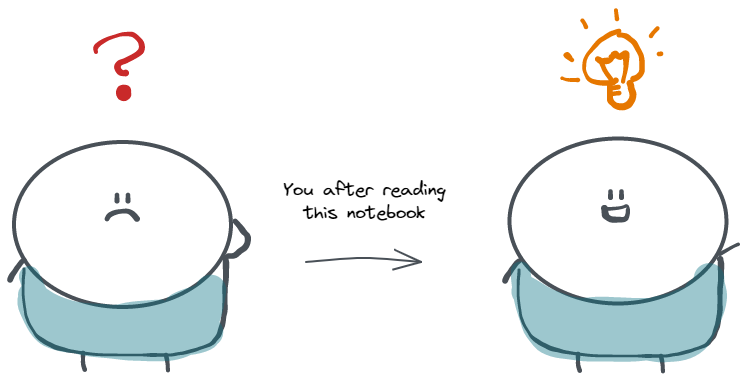

# Table of Contents

0. Key terminologies 
2. When to perform a statistical test
3. Parametric tests: regression, comparison, or correlation tests
4. Nonparametric tests
5. Sample Codes

# Key Terminologies

**Dependent and Independent Variables**

From the world itself, a dependent variable is dependent/based on the independent variable.
- Independent variable is also called predictor variable
- Dependent variable is also called output variable


**Types of Variables**

It is critical to determine the type of variables that are being tested to know the appropriate statistical test to adopt. It is mainly divided into 2 main categories and further subdivided as follows:

1. **Numerical:** expressed in terms of numbers
    - **Discrete:** describe counts, can only be expressed in whole numbers
    - **Continuous:** describe measures, can be expressed with decimal points
    
    
2. **Categorical:** expressed in terms of groupings
    - **Ordinal:** represent data with an order
    - **Nominal:** represent data in group names
   
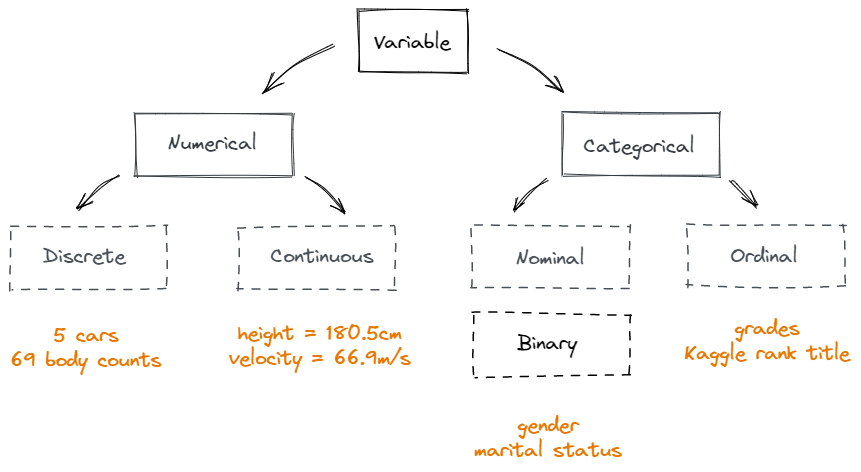

# Statistical Tests

- Statistics allows us to interpret our data
- Statistical tests enable us to investigate the effect and relationship between the variables we are testing on.

**Hypothesis Testing**
- Statistical tests are used in Hypothesis testing.
    - to determine if the variables are significantly related with one another
    - assess the difference between the groups in comparison
    
    
- This test assumes a null hypothesis of no difference/relationship between groups, which will then be validated by performing **stats test** and determining if there is **enough evidence** to suggest that the null hypothesis is true.

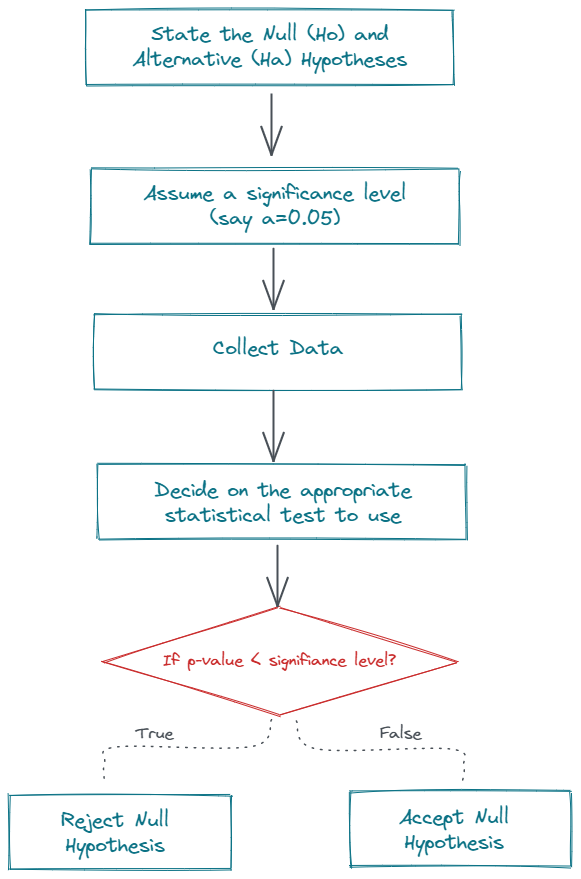

# Choosing a Parametric Test
The most common types of parametric tests include regresion, comparison, and correlation tests:

1. **Regression tests**
    - seeks to explain the cause-and-effect relationship between variables.
    - only applies on **continuous or binary data.**
    
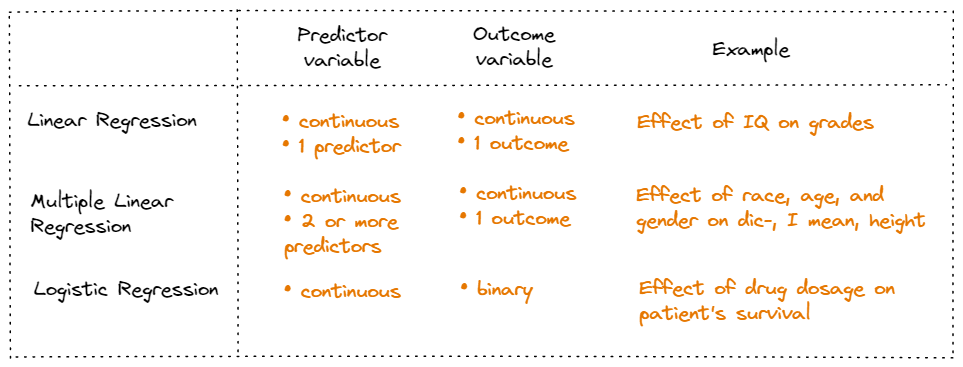

2. **Comparison tests**
    - asseses the difference of means among groups, the means (average) become the metric that is being compared here.
    - **t-tests** for comparing means of two groups
    - **ANOVA** test when comparing means of 2+ groups
    
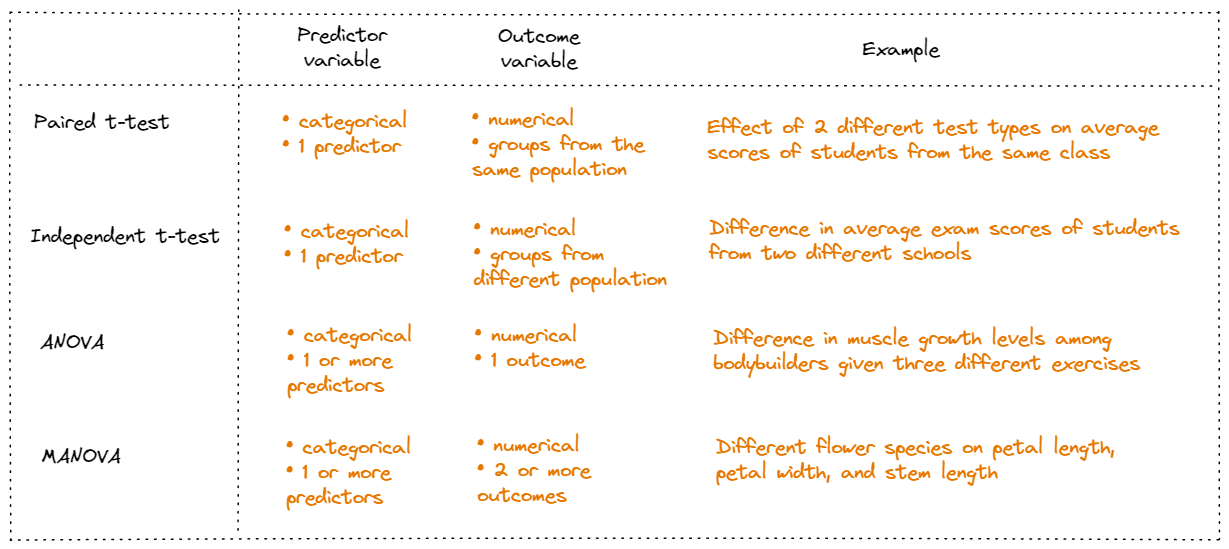

3. **Correlation tests**
    - test how variables are related with one another without the need to perform regression analysis
    
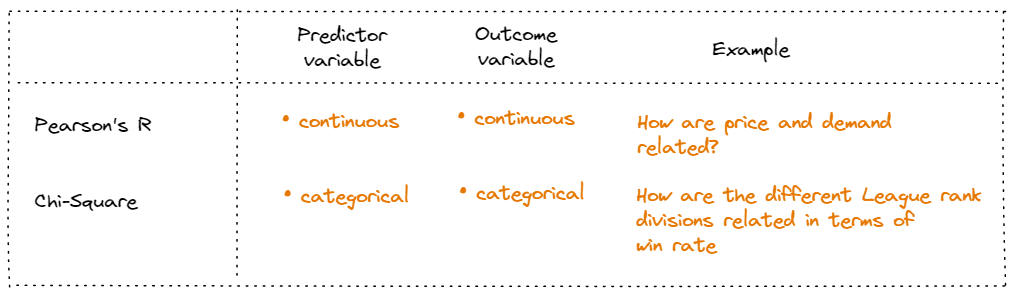

# Choosing a Nonparametric Test

Non-parametric tests are used when one or more statistical assumptions are violated. It must be noted that these tests' inferences are usually not as strong as with parametric tests.

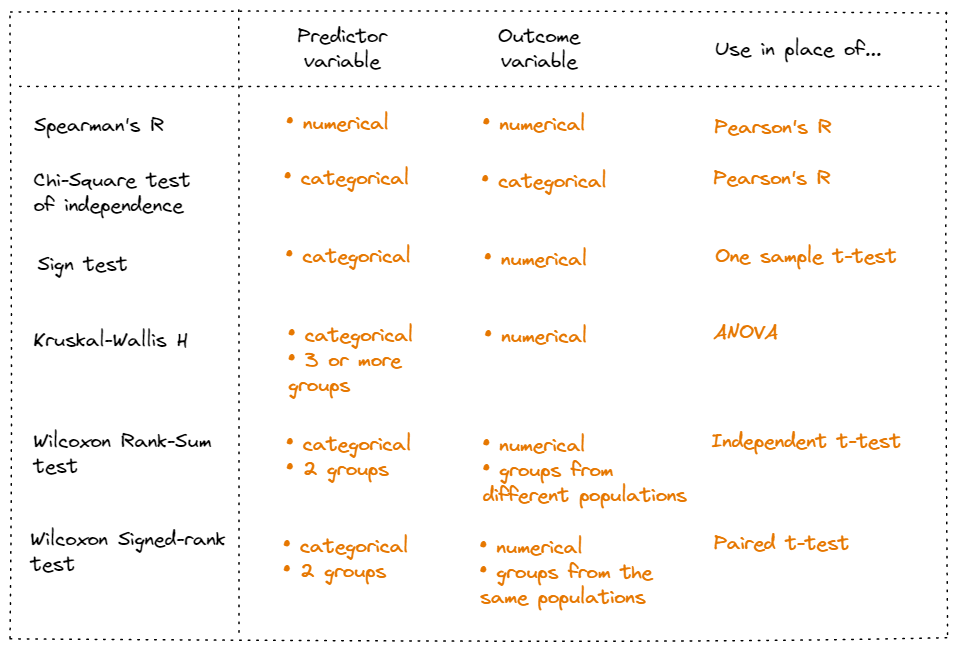

# Cheat Sheet: Choosing the Statistical Test

This flowchart can definitely help for a dummy like me. 

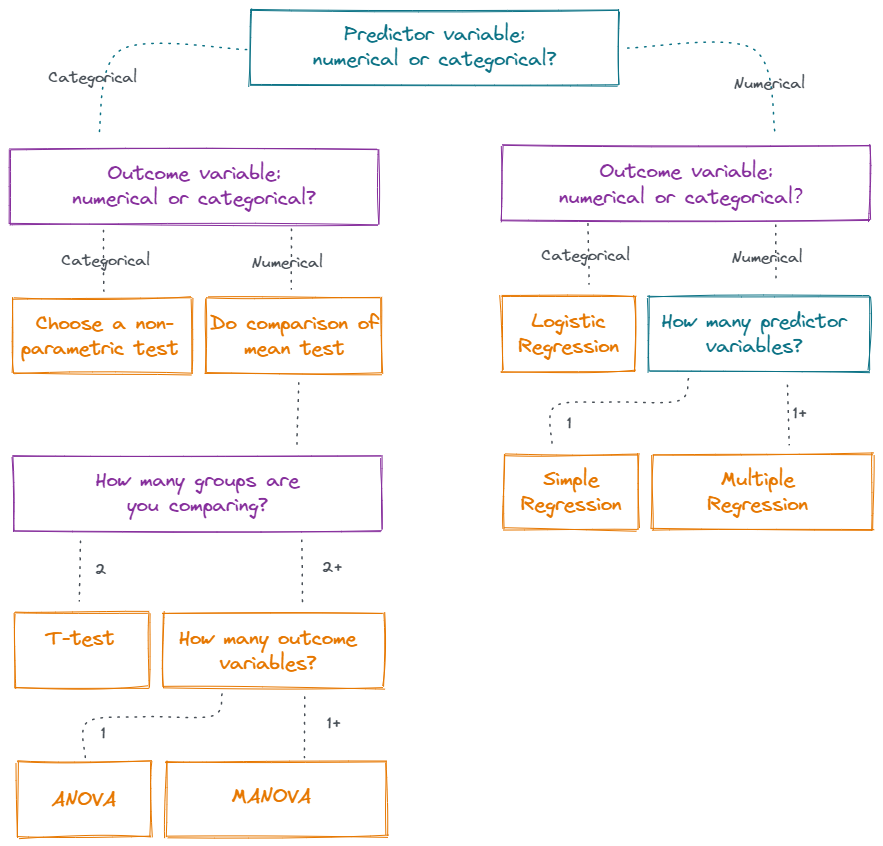

# Sample Codes

**Comparison test**

*Independent t-test*
- Look for the difference in the number of goals between the Home and Away teams of World Cup soccer matches
- **predictor variable:** Home and Away teams
- **output variable:** goals

In [1]:
import pandas as pd
wcm = pd.read_csv('/kaggle/input/soccer-world-cup-challenge/world_cup_matches.csv')
wcm[['Home Goals', 'Away Goals']].head()

,Home Goals,Away Goals
0,4,1
1,3,0
2,2,1
3,3,1
4,1,0


In [2]:
from scipy.stats import ttest_ind
# Convert dataframe column to lists of data
stat, p = ttest_ind( wcm['Home Goals'].tolist(), wcm['Away Goals'].tolist() )
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. There is no significant difference between the groups.')
else:
	print('Accept the Alternative Hypothesis. There is a significant difference between the groups.')

stat=11.736, p=0.000
Accept the Alternative Hypothesis. There is a significant difference between the groups.


---
**Comparison test**

*ANOVA*
- Test whether the revenue contributed from different payment method used by customers are any significantly different. 
- **predictor variables:** payment method (credit card, bank withdrawal, etc.)
- **output variable:** total revenue

In [3]:
churn = pd.read_csv('/kaggle/input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
# Filtering the lists of data for each payment method
cc = churn[churn['Payment Method'] == 'Credit Card']['Total Revenue'].to_list()
bw = churn[churn['Payment Method'] == 'Bank Withdrawal']['Total Revenue'].to_list()
mc = churn[churn['Payment Method'] == 'Mailed Check']['Total Revenue'].to_list()

In [5]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway

stat, p = f_oneway(cc, bw, mc)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. There is no significant difference among the groups.')
else:
	print('Accept the Alternative Hypothesis. There is a significant difference among the groups.')

stat=74.589, p=0.000
Accept the Alternative Hypothesis. There is a significant difference among the groups.


---
**Correlation Test**

*Pearson's Correlation Test*
- **predictor variable:** Lot Area
- **output variable:** House Price

In [6]:
house_prices = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Filtering out data in forms of lists
la = house_prices.LotArea.tolist()
sp = house_prices.SalePrice.tolist()

In [8]:
# Example of the Pearson's Correlation test
from scipy.stats import pearsonr

stat, p = pearsonr(la, sp)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. There is no significant correlation between the variables.')
else:
	print('Accept the Alternative Hypothesis. There is a significant correlation between the variables.')

stat=0.264, p=0.000
Accept the Alternative Hypothesis. There is a significant correlation between the variables.


---
**Correlation Test**

*Chi-Squared Test*
- **predictor variable:** gender
- **output variable:** survival passengers

In [9]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Create a matrix between the predictor and output variables
titanic.groupby('Survived')['Sex'].value_counts().unstack()

Sex,female,male
Survived,,
0,81,468
1,233,109


In [11]:
# Example of the Chi-Squared Test
from scipy.stats import chi2_contingency
table = [[81, 468],[233, 109]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. There is no significant difference between the groups.')
else:
	print('Accept the Alternative Hypothesis. There is a significant difference between the groups.')

stat=260.717, p=0.000
Accept the Alternative Hypothesis. There is a significant difference between the groups.


---
**BONUS**
- Let me prep u up real quick
- There is another form of statistical test that is commonly used in time series analysis
- We use **Stationary tests** to check if a time series is stationary (follows no trend and constant variance) or not. 

**Stationary Tests**

*Augmented Dickey-Fuller Unit Root Test*





In [12]:
pizza = pd.read_excel('/kaggle/input/pizza-sales/Data Model - Pizza Sales.xlsx')
sales = pizza[['order_date', 'quantity']]
sales.head()

,order_date,quantity
0,2015-01-01,1
1,2015-01-01,1
2,2015-01-01,1
3,2015-01-01,1
4,2015-01-01,1


In [13]:
from statsmodels.tsa.stattools import adfuller

# Convert to datetime format
sales = sales.groupby(['order_date'])['quantity'].sum().reset_index()
sales['order_date'] = pd.to_datetime(sales['order_date'])

# syntax for Dickey-Fuller Test
stat, p, lags, obs, crit, t = adfuller(sales['quantity'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. The time series is not stationary.')
else:
	print('Accept the Alternative Hypothesis. The time series is stationary.')

stat=-5.220, p=0.000
Accept the Alternative Hypothesis. The time series is stationary.


In [14]:
esales = pd.read_csv('/kaggle/input/-women-clothing-ecommerce-sales-data/women_clothing_ecommerce_sales.csv')
esales.head()

,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


In [15]:
esales['date'] = pd.to_datetime(esales['order_date']).dt.date

# Fill missing dates with 0 sales
idx = pd.date_range('2022-06-01', '2022-09-30')
s = esales.groupby('date')['quantity'].sum()
s.index = pd.DatetimeIndex(s.index)
s = s.reindex(idx, fill_value=0)
s = s.tolist()

In [16]:
# syntax for Dickey-Fuller Test
stat, p, lags, abs, crit, t = adfuller(s)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Accept the Null Hypothesis. The time series is not stationary.')
else:
	print('Accept the Alternative Hypothesis. The time series is stationary.')

stat=-9.453, p=0.000
Accept the Alternative Hypothesis. The time series is stationary.
